In [1]:
%reload_ext autoreload
%autoreload 2
import torch
from fastai.vision.all import *
import json

In [2]:
bce = torch.nn.BCE()

In [9]:
p = torch.zeros(2)
p[0]=0
p

tensor([0., 0.])

In [10]:
bce(p,p)

tensor(0.)

In [36]:
class SpecialTuple(tuple):
    def __len__(self):
        return len(next(iter(self)))
    def __getitem__(self, key):
        return [a[key] for a in self]

In [2]:
df =pd.read_json('results.json')
df.head()

,train_config.AdamOpt.args,train_config.bernoulli_loss.subtract_true_image_entropy,train_config.dataset.name,train_config.model.decoder_fn,train_config.model.encoder_fn,train_config.model.num_latent,train_config.reconstruction_loss.activation,train_config.reconstruction_loss.loss_fn,train_config.train.batch_size,train_config.train.eval_steps,...,evaluation_results.gaussian_wasserstein_correlation,evaluation_results.gaussian_wasserstein_correlation_norm,evaluation_results.mutual_info_score,train_config.beta_tc_vae.beta,train_config.annealed_vae.c_max,train_config.annealed_vae.gamma,train_config.annealed_vae.iteration_threshold,train_config.dip_vae.dip_type,train_config.dip_vae.lambda_d_factor,train_config.dip_vae.lambda_od
0,{'lr': 0.0001},False,'dsprites_full',@deconv_decoder,@conv_encoder,10,'logits',@bernoulli_loss,64,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
1,{'lr': 0.0001},False,'dsprites_full',@deconv_decoder,@conv_encoder,10,'logits',@bernoulli_loss,64,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
2,{'lr': 0.0001},False,'dsprites_full',@deconv_decoder,@conv_encoder,10,'logits',@bernoulli_loss,64,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
3,{'lr': 0.0001},False,'dsprites_full',@deconv_decoder,@conv_encoder,10,'logits',@bernoulli_loss,64,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
4,{'lr': 0.0001},False,'dsprites_full',@deconv_decoder,@conv_encoder,10,'logits',@bernoulli_loss,64,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN


In [3]:
df.keys()

Index(['train_config.AdamOpt.args',
       'train_config.bernoulli_loss.subtract_true_image_entropy',
       'train_config.dataset.name', 'train_config.model.decoder_fn',
       'train_config.model.encoder_fn', 'train_config.model.num_latent',
       'train_config.reconstruction_loss.activation',
       'train_config.reconstruction_loss.loss_fn',
       'train_config.train.batch_size', 'train_config.train.eval_steps',
       'train_config.train.model', 'train_config.train.model_num',
       'train_config.train.name', 'train_config.train.opt_name',
       'train_config.train.random_seed', 'train_config.train.training_steps',
       'train_config.vae.beta', 'train_results.reconstruction_loss',
       'train_results.elbo', 'train_results.loss', 'train_results.kl/0',
       'train_results.kl/1', 'train_results.kl/2', 'train_results.kl/3',
       'train_results.kl/4', 'train_results.kl/5', 'train_results.kl/6',
       'train_results.kl/7', 'train_results.kl/8', 'train_results.kl/9',
       

In [7]:
df[['evaluation_results.discrete_mig','path','train_results.elapsed_time']].dropna()

,evaluation_results.discrete_mig,path,train_results.elapsed_time
2,0.096432,1/metrics/mean/mig/results/aggregate/evaluation.json,7151.220019
7,0.087801,1/metrics/sample/mig/results/aggregate/evaluation.json,7151.220019
13,0.083273,1200/metrics/mean/mig/results/aggregate/evaluation.json,7200.044211
19,0.083539,1200/metrics/sample/mig/results/aggregate/evaluation.json,7200.044211
25,0.328362,1500/metrics/mean/mig/results/aggregate/evaluation.json,6413.641646
31,0.257685,1500/metrics/sample/mig/results/aggregate/evaluation.json,6413.641646
36,0.171647,250/metrics/mean/mig/results/aggregate/evaluation.json,6564.963388
41,0.134278,250/metrics/sample/mig/results/aggregate/evaluation.json,6564.963388
46,0.259252,152/metrics/mean/mig/results/aggregate/evaluation.json,6615.325611
51,0.256081,152/metrics/sample/mig/results/aggregate/evaluation.json,6615.325611


In [25]:
mean_results=('MIResults/ckp_*/*/metrics/metrics/mean/mig/results/aggregate/evaluation.json')
files=glob.glob(mean_results)

In [26]:
results=[]
for file in files:
    match = re.search('ckp_(\d+)/(\d+)/',file)
    i,trail = match.groups()
    with open(file) as fp:
        data= json.load(fp)
    t = {'ckp':int(i),'trail':int(trail)}
    t.update(data)
    results.append(t)
df = pd.DataFrame(results)
df.head()

,ckp,trail,train_config.vae/AdamOptimizer.beta1,train_config.vae/AdamOptimizer.beta2,train_config.vae/AdamOptimizer.epsilon,train_config.vae/AdamOptimizer.learning_rate,train_config.vae/AdamOptimizer.name,train_config.vae/AdamOptimizer.use_locking,train_config.bernoulli_loss.subtract_true_image_entropy,train_config.dataset.name,...,evaluation_config.mig.num_train,evaluation_results.discrete_mig,evaluation_results.discrete_d_mig,evaluation_results.discrete_mi,evaluation_results.elapsed_time,evaluation_results.uuid,train_config.annealed_vae.c_max,train_config.annealed_vae.gamma,train_config.annealed_vae.iteration_threshold,train_config.beta_tc_vae.beta
0,10,0,0.9,0.999,1e-08,0.0001,'Adam',False,False,'dsprites_full',...,10000,0.087339,"[0.037811077553504345, 0.31240521008091554, 0.006735709373402104, 0.07140859346990146, 0.008335801500035553]","[[0.009036614164866733, 0.04632164900954142, 0.03865210783118289, 0.3119933997688722, 0.38927562417035655], [0.015450830664303644, 0.017065262806497145, 0.06292410768544465, 0.054021467054844854, 0.05221166277552329], [0.09684593593478705, 0.6059801723521507, 0.03983549474011131, 0.056953453382697625, 0.1053975935745256], [0.03962041942924636, 0.019860501574302025, 0.10972241360654678, 0.07366815648540607, 0.36039330361557087], [0.024958068055133436, 0.021963375615820773, 0.08488457449560508, 0.046305816227638595, 0.04728144069957054], [0.016484184186168538, 0.018812970378537713, 0.0647045...",20.080017,ac66a63f-a2cb-4ccf-b7ee-f2ba0bab02aa,NaN,NaN,NaN,NaN
1,10,1500,0.9,0.999,1e-08,0.0001,'Adam',False,False,'dsprites_full',...,10000,0.358783,"[0.18278624142184366, 0.46657500937841706, 0.0005572940989900731, 0.5669814386948954, 0.5770141351833996]","[[0.002572135534527946, 0.039180623689944315, 0.03436038398270975, 0.079766743621586, 0.07610012399621349], [0.0063229297343555535, 0.061959821833907656, 0.04104509543984257, 0.11809859318775692, 0.05440652144435332], [0.006416429864355418, 0.027216735217192586, 0.03502743393373312, 0.061867065981681374, 0.06070978890934739], [0.001752256137246996, 0.01604211671274244, 0.031980802775330205, 0.1641066252421413, 0.07920609357548887], [0.00502564966958422, 0.026824871919808688, 0.03660022008475526, 0.0796937361666265, 0.053220141211428165], [0.007216224465634149, 0.027473312794812296, 0.04495...",21.105207,9d0410c8-5d52-45a1-91ca-407982f61c62,5.0,1000,100000,NaN
2,10,1501,0.9,0.999,1e-08,0.0001,'Adam',False,False,'dsprites_full',...,10000,0.333883,"[0.17435636931496964, 0.4417987415084416, 0.0001712981658840229, 0.5133690905047108, 0.5397179426647939]","[[0.006659953114552943, 0.0442240754264304, 0.040592813287215826, 0.08809052400800518, 0.11722851375110399], [0.0067544617640776594, 0.03232414438824568, 0.03743604989142825, 0.09504120688277992, 0.08193459146694632], [0.006762721668497055, 0.05325446625969395, 0.0362273859075672, 0.08086696991284331, 0.08829831478440553], [0.20357214403557805, 0.8703803471821803, 0.04243163765355579, 0.09592397690833382, 0.10883481045879131], [0.009496804342033064, 0.05308233346144183, 0.035126845367681486, 0.08743654575515794, 0.06150716999707289], [0.00730122207567624, 0.03166519307649468, 0.04128633517...",19.708924,70e457fd-2dbf-42e9-9bd7-12b26e367a77,5.0,1000,100000,NaN
3,10,1502,0.9,0.999,1e-08,0.0001,'Adam',False,False,'dsprites_full',...,10000,0.363736,"[0.18511129699041814, 0.4700514318789158, 0.0006864262003847972, 0.5893451731118654, 0.5734857775352589]","[[0.0058958817202414224, 0.059360692144356124, 0.039298156156778744, 0.06577333932292351, 0.07411339807748346], [0.006599764746574243, 0.03566980843507005, 0.04421352152067989, 0.08131226276185427, 0.09751182591344801], [0.009117601474595713, 0.037249414626233185, 0.035167039046699995, 0.06611152785429766, 0.0985679999888864], [0.006118023821907826, 0.030304137045286235, 0.04045387524231381, 2.149812009312824, 0.03150637940170524], [0.006988938976799969, 0.026319149006995543, 0.03386139282007313, 0.09320823579871662, 0.08003557801498029], [0.00739414549

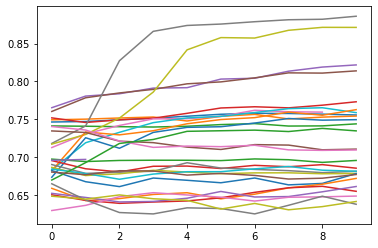

In [24]:
for trail, process in df.groupby('trail'):
    plt.plot(process.sort_values('ckp')['evaluation_results.informativeness_train'].to_list(),label=trail)
#     break
#plt.legend()

In [20]:
process['evaluation_results.discrete_mig']

0      0.087339
28     0.079229
57     0.080591
86     0.081429
113    0.082901
141    0.083396
169    0.083974
197    0.085295
225    0.084354
253    0.086409
Name: evaluation_results.discrete_mig, dtype: float64

In [55]:
df[df['discrete_mig']>0.3]

,ckp,trail,discrete_mig,discrete_d_mig,discrete_mi,elapsed_time,uuid
1,10,1500,0.365052,"[0.193286895293431, 0.48052096706600395, 0.0002913859029608898, 0.5709215544962711, 0.5802384316960635]","[[0.005031350342484894, 0.04981158647321517, 0.033149983278331074, 0.08422637205339095, 0.08215644320807498], [0.005167563990508156, 0.05797712724010368, 0.038118145935745036, 0.10952582584747837, 0.05127850276487736], [0.007020853774340694, 0.02491641948304294, 0.03306675375204589, 0.06430396882762367, 0.06101122460176052], [0.0033250714411359734, 0.018098097454470382, 0.030574835901932895, 0.16588882375936462, 0.0806607997269562], [0.0034834184626854887, 0.02649796068401576, 0.0364263753546786, 0.07997864168115731, 0.05677079427151338], [0.007564119925458988, 0.030118875416876106, 0.0385...",25.479454,a66268fa-07cc-4d33-a311-f60f976ac9ba
2,10,1501,0.335631,"[0.17383042103895532, 0.45187046384448, 0.000681531546723685, 0.5139803199291615, 0.5377932959527341]","[[0.005991646025091152, 0.045447921765872416, 0.03683938767396078, 0.08129801635126657, 0.12299785236846736], [0.008400063423555903, 0.0345498808124347, 0.03677249137625942, 0.10158421255655589, 0.08018189432523484], [0.007002937254666205, 0.05599064225495354, 0.038727115363450276, 0.07828906978651273, 0.09100744858575219], [0.20199312723304727, 0.8862296795356924, 0.042708009914355964, 0.096501517203847, 0.1027972077317492], [0.010975048354434426, 0.0596949798979248, 0.030251689058223223, 0.0827645790235702, 0.06342249514066924], [0.008391402346390178, 0.032771054920030525, 0.036920169656...",27.002357,285936b2-ae44-4cf3-b8f8-04061d394e2c
3,10,1502,0.363948,"[0.1779459690669097, 0.4785001421536756, 0.0007787275918732534, 0.5836514103037204, 0.5788628547248653]","[[0.007697293564769824, 0.0593077521672327, 0.03687609217845354, 0.06639039748581506, 0.07960540186503141], [0.00671622934059679, 0.02793709843564567, 0.03860200315052873, 0.083436394046318, 0.10610531826649428], [0.007626622815850878, 0.03367686956412732, 0.034698559917922395, 0.06407237632511106, 0.10691904477908182], [0.009439759888169393, 0.03282298651294469, 0.04258916093215319, 2.134893020248153, 0.028891807973980225], [0.004549194826451019, 0.025183091811876588, 0.030774921787640703, 0.09032525006572593, 0.0778519971295534], [0.00893612824810986, 0.03412078510260546, 0.0397187099436...",25.807994,1544130a-5ea7-4bc0-9c94-8fadca0b6c37
15,10,251,0.348599,"[0.10945809208359267, 0.5119469292968899, 0.0003941258007244294, 0.5739007641129965, 0.5472974950542056]","[[0.036431917899777795, 0.07680382771548731, 0.05377634110819621, 0.10570849953347443, 0.11944572847641716], [0.09808131695414361, 0.07440426816657747, 0.048374597941556574, 0.09412988164844457, 0.061339581333365645], [0.039286465727717705, 0.04086237781499074, 0.037447283282059686, 0.10439422381398791, 0.22329386254764189], [0.011017661689495608, 0.008587113912195311, 0.04655817189051828, 2.1343601651806443, 0.030610499564187946], [0.0825334903276704, 0.09290613363539262, 0.05717858758463984, 0.14638423630779435, 0.07882427768497582], [0.012241910147656247, 0.010210313815887767, 0.0424407...",25.686989,9046303c-de68-4346-b704-757f2cf11175
16,10,252,0.375885,"[0.1577439627578945, 0.5266904220501367, 0.07371406808077866, 0.5637300750576555, 0.5575443197435994]","[[0.05856638991024499, 0.10949987995292255, 0.10748935048008468, 0.10348222035385868, 0.11392601656859841], [0.051232756566920085, 0.11455490512371566, 0.07604091296094014, 0.09348201588780987, 0.20282149213845724], [0.2902709723345285, 0.22276997567193751, 0.3792051876933412, 0.043328192083181324, 0.04193834772962098], [0.4635494401703977, 1.1663365164584678, 0.06740324591069154, 0.06090803601576519, 0.03493056096769991], [0.0342876527712542, 0.13315111564173182, 0.04705809847144228, 0.2021131592877975, 0.09659129927650259], [0.013880887186050258, 0.009763032165561063, 0.04148410804188024...",24.277098,2b41ec99-746a-47e5-acf8-b2a643d6974d
97,3,1500,0.310500,"[0.13469026871092887, 0.40785571652929037, 5

In [30]:
df[df['ckp']==10][['evaluation_results.discrete_mig','trail']]

,evaluation_results.discrete_mig,trail
0,0.087339,0
1,0.358783,1500
2,0.333883,1501
3,0.363736,1502
4,0.091446,150
5,0.148033,151
6,0.175429,152
7,0.023492,1650
8,0.005810,1651
9,0.062661,1


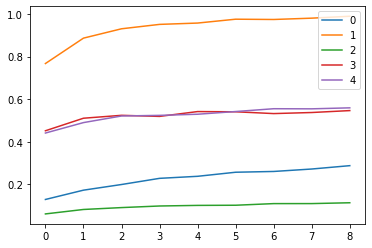

In [79]:
# mi 
trail = 151
data = np.array(results[9][trail]['discrete_mi'])
infor_dim = data.argmax(0)

metrics=[]
for i in range(1,10):
    data = np.array(results[i][trail]['discrete_mi'])
    metrics.append(data[infor_dim,range(5)])
metrics = np.stack(metrics)
for i in range(5):
    plt.plot(metrics[:,i],label=i)
plt.legend()

[0.28289178 0.47341449 0.17104666 0.51331906 0.52752864]
0.08771730154830927


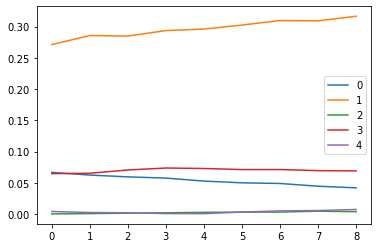

In [110]:
# mi percent
trail = 0
entropy = np.log([3,6,40,32,32])
data = np.array(results[9][trail]['discrete_mi'])
infor_dim = (data/data.sum(1,keepdims=True)).argmax(0)
print(data.sum(0)/entropy)
print(results[9][trail]['discrete_mig'])
metrics=[]
for i in range(1,10):
    data = np.array(results[i][trail]['discrete_mi'])
    data.sort(0)
    metrics.append((data[-1,:]-data[-2,:])/entropy)
metrics = np.stack(metrics)
for i in range(5):
    plt.plot(metrics[:,i],label=i)
plt.legend()

In [102]:
data[-1,:]

array([0.04123072, 0.18407824, 0.06581328, 0.96229024, 0.97559766])

In [12]:
a=np.array([[-7.008282842946302e-16,-7.008282842946302e-16,-7.008282842946302e-16,0.007486822113552842,0.20955580791467143,0.21694143686417125],[9.367506770274757e-17,9.367506770274757e-17,9.367506770274757e-17,0.007158382144239975,0.20513407651903673,0.18940479833116505],[-6.938893903907227e-17,-6.938893903907227e-17,-6.938893903907227e-17,0.008052565037922352,0.21031576006747843,0.23013573142422497],[2.5587171270657905e-16,2.5587171270657905e-16,2.5587171270657905e-16,0.008555877344540493,0.1531172316701163,0.16312299003666825],[6.938893903907227e-17,6.938893903907227e-17,6.938893903907227e-17,0.00793611424112986,0.26680478730089613,0.21450148627109905],[2.8102520310824275e-16,2.8102520310824275e-16,2.8102520310824275e-16,0.007589227323700348,0.22715044622292255,0.10261842887575752],[2.255140518769849e-16,2.255140518769849e-16,2.255140518769849e-16,0.007182329932919207,0.3541685977829361,0.19686082583140757],[-5.130444680201407e-16,-5.130444680201407e-16,-5.130444680201407e-16,0.007796386146325618,0.21203879169014356,0.18782677398443184],[-3.538835890992686e-16,-3.538835890992686e-16,-3.538835890992686e-16,0.008277019591843703,0.1848939319934417,0.32078284584650174],[4.8572257327350605e-17,4.8572257327350605e-17,4.8572257327350605e-17,0.006851254893035902,0.16321920659218114,0.13810416842452009]])

In [14]:
a.min()

-7.008282842946302e-16

In [63]:
fvae_results=[]
for file in glob.glob('wandb/*/files/metrics.log'):
    with open(file) as fp:
        data= json.load(fp)
    run_name = re.search('run-.*-(.*)/files',file).group(1)
    data['name']=run_name
    fvae_results.append(data)
fvae_df=pd.DataFrame(fvae_results)
fvae_df.head()

,discrete_d_mig,discrete_mi,discrete_mig,name
0,"[0.0007695054575579988, 0.003892710429670249, 0.0008058863386120773, 0.3124007393424891, 0.2643847311971475]","[[0.011262684682472124, 0.05237656387484791, 0.040815691736237836, 1.3576955543456104, 0.08592440304070997], [0.010244881399588165, 0.060131764668356194, 0.03426774598483464, 0.06811160060303474, 1.3859284223913995], [0.008404012628136977, 0.042290548191751424, 0.03635664274794889, 0.2753749175193744, 0.19018044217978228], [0.01549461684827961, 0.06029543416702819, 0.03152093505425807, 0.11027795098672447, 0.08867076140459146], [0.009887034558922042, 0.04568120817354079, 0.03671515475420836, 0.1473021513838333, 0.08828585882713826], [0.020988659840953508, 0.09120678886425151, 0.03784457548...",0.116451,2tgjunwn
1,"[0.2543119011586686, 0.509738833748322, 0.00020174992485233034, 0.47444047371405706, 0.43937328240760243]","[[0.0033104893729816085, 0.014301132498464245, 0.040111879600833705, 1.8237784042386207, 0.045844650574716546], [0.003374331344658419, 0.015830572962481727, 0.03936807436284302, 0.040917023754544035, 1.8335632627714287], [0.013327336053961022, 0.05607570070312678, 0.035313900566852185, 0.07903670591864248, 0.06214187638057488], [0.3125343660751096, 1.0689383942102748, 0.03845631717552342, 0.07034107194547765, 0.05157136608292322], [0.033171042528905105, 0.1557093695372012, 0.03301061795564045, 0.06126675263218581, 0.06543583982331598], [0.020571704960258178, 0.07467857432344574, 0.03334552...",0.335613,1n9ym08y
2,"[0.3036593951440956, 0.527534247902558, 0.0007140505327522473, 0.5149663274761868, 0.4827233227576157]","[[0.00589770125533025, 0.009157820442616876, 0.04087733311330356, 1.979759604920231, 0.03574177009482756], [0.005976354879007785, 0.010696978883742245, 0.03824479420732922, 0.033898483331074605, 1.9837560296299397], [0.007266505316681122, 0.03683502715853564, 0.03357362482295223, 0.06289048214834306, 0.06440494505058883], [0.3643915567438899, 1.0702297282852313, 0.035716197244298774, 0.0804021466858072, 0.05995964365086787], [0.030819681157314986, 0.12511910535874646, 0.03235723846699298, 0.056801138381915944, 0.05704127063949341], [0.010046873571744481, 0.0546124917079878, 0.0322354827518...",0.365919,7nlboydx
3,"[0.08489880343114856, 0.5135052120888363, 0.0167741984203937, 0.524397674539791, 0.5075546761059212]","[[0.013492307261832856, 0.008207154334819809, 0.041691827748921204, 2.096488935965929, 0.0324229099892389], [0.015304786789140976, 0.0061910176510562714, 0.04411416702217009, 0.028326213241153947, 2.0697880063965357], [0.008580649320462475, 0.00900481833814834, 0.03559317999795261, 0.2796993014322116, 0.16818341063954578], [0.49076105576434226, 1.18453709355138, 0.038359026289406364, 0.03248761666873573, 0.03697362557778644], [0.08732166913076835, 0.22652780782268817, 0.03362185155881817, 0.04859803936868509, 0.052883690420907445], [0.24886895082099592, 0.26456036634764946, 0.0383485033925...",0.329426,kkowup47
4,"[0.001001102083063356, 0.0005521429460301499, 0.000494201690348956, 0.27848777376542816, 0.31097318502747573]","[[0.01402283204124882, 0.08070178303121346, 0.037676957044807044, 1.5525448052565807, 0.04330575615662144], [0.012941491471021978, 0.07905402984342472, 0.039498964196355964, 0.5877165360133515, 0.16718139300246096], [0.013407702225308472, 0.07421862410485605, 0.03739025882721554, 0.05193450714152756, 1.4335798289967054], [0.011394812456251322, 0.05305708984107526, 0.03732378540898429, 0.1503571569619943, 0.1766291036218982], [0.003851329908642387, 0.020441001665315508, 0.03683438695459013, 0.067681577792419, 0.08342069851352157], [0.0053984185015472416, 0.02523605629888272, 0.0320773098500...",0.118302,3fsjfjup


In [68]:
fvae_df[fvae_df['discrete_mig']>0.3].sort_values('discrete_mig')

,discrete_d_mig,discrete_mi,discrete_mig,name
15,"[0.017665785273385134, 0.4637060210424628, 0.02672293661342484, 0.5456126656169673, 0.5487681271094641]","[[0.013128955867902891, 0.004702163496850344, 0.047402239079654754, 0.02705163727433566, 2.153552031963694], [0.011314294553981353, 0.0058788487983987316, 0.04188287360608287, 2.099260819415225, 0.02961010180033613], [0.008172185509642754, 0.011963468360522228, 0.023627599042919695, 0.11881765683347384, 0.20200265345878368], [0.19908112139285417, 0.22124396229912816, 0.029129125736552908, 0.046243694935343735, 0.038587938213804726], [0.07228077410072306, 0.1454616703502129, 0.027603192009929518, 0.03224185657869216, 0.04215777754124213], [0.3552740396793801, 1.0520603758702283, 0.050202569...",0.320495,2xmiziwl
19,"[0.03406360930188504, 0.48960699459111934, 0.00559047161199774, 0.555302353577447, 0.5243015924750207]","[[0.0112808488898477, 0.0057399305466146145, 0.04087647282317547, 2.0691585726931243, 0.03169315608942884], [0.011396784990662342, 0.005711531549842339, 0.041756080302675774, 0.03143727672969221, 2.037607966230146], [0.007675405578529281, 0.016868786174020788, 0.03267288032037356, 0.08904230891696946, 0.11458306646222735], [0.41618552133701653, 1.1344525189968522, 0.03580430203806129, 0.039997032358457904, 0.028932790534904582], [0.06640698375457987, 0.2573275961305652, 0.037910666410563815, 0.07356937052258804, 0.06057009054778764], [0.11475208600649367, 0.11485171626485131, 0.03395174142...",0.321773,1f2s4h4n
10,"[0.27361460384499325, 0.506827921517915, 0.00032959356058140653, 0.42556783746151416, 0.4063871447890676]","[[0.0055012215070105825, 0.03149465320399423, 0.03351413848329683, 0.09870988935778413, 0.09138455475742621], [0.005186928600559721, 0.008766893498187767, 0.04054890028347925, 1.6416981806370436, 0.04561155188670457], [0.005481475036298576, 0.007800694927694103, 0.03751355094776718, 0.04665421099357349, 1.630382768050689], [0.009133197227187213, 0.042463426656950826, 0.02864996868223059, 0.05799216614106528, 0.07056074170916014], [0.010848572115626152, 0.037551582908529654, 0.03547388910909155, 0.05766168945591056, 0.06180816949142088], [0.3590892195508881, 1.076231905988391, 0.03933376517...",0.322545,139xugx2
3,"[0.08489880343114856, 0.5135052120888363, 0.0167741984203937, 0.524397674539791, 0.5075546761059212]","[[0.013492307261832856, 0.008207154334819809, 0.041691827748921204, 2.096488935965929, 0.0324229099892389], [0.015304786789140976, 0.0061910176510562714, 0.04411416702217009, 0.028326213241153947, 2.0697880063965357], [0.008580649320462475, 0.00900481833814834, 0.03559317999795261, 0.2796993014322116, 0.16818341063954578], [0.49076105576434226, 1.18453709355138, 0.038359026289406364, 0.03248761666873573, 0.03697362557778644], [0.08732166913076835, 0.22652780782268817, 0.03362185155881817, 0.04859803936868509, 0.052883690420907445], [0.24886895082099592, 0.26456036634764946, 0.0383485033925...",0.329426,kkowup47
13,"[0.22471710386313143, 0.3562319100681856, 0.0008414568397308914, 0.5500927585302067, 0.5385303185176497]","[[0.008935008504072984, 0.020625429325722498, 0.03793381723667715, 0.034119130209903245, 2.208643723939973], [0.007264297298901877, 0.017751805459810924, 0.03985968906821255, 2.178886226437765, 0.03133905300824528], [0.010801115723225141, 0.04273765573535039, 0.03595106504403879, 0.07739549188042535, 0.0923890534590872], [0.02075439379266132, 0.21044173834318441, 0.03795514809280717, 0.06481701948429922, 0.0768838144207947], [0.06879656446553772, 0.42502409918683537, 0.036074347917072175, 0.07043868839519818, 0.09039546963151542], [0.3156622432705668, 1.0631291392905076, 0.0364451031440735...",0.334083,2yezxqot
1,"[0.2543119011586686, 0.509738833748322, 0.00020174992485233034, 0.47444047371405706, 0.43937328240760243]","[[0.0033104893729816085, 0.014301132498464245, 0.040111879600833705, 1.8237784042386207, 0.045844650574716546], [0.003374331344658419, 0.015830572962481727, 0.03936807436284302, 0.040917023754544035, 

In [1]:
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("erow/experiments")
summary_list = [] 
config_list = [] 
name_list = [] 
for run in runs: 
    # run.summary are the output key/values like accuracy.
    # We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict) 

    # run.config is the input metrics.
    # We remove special values that start with _.
    config = {k:v for k,v in run.config.items() if not k.startswith('_')}
    config_list.append(config) 

    # run.name is the name of the run.
    name_list.append(run.name)       


In [3]:
name_list[:22]

['swept-smoke-207',
 'exalted-cloud-206',
 'icy-energy-205',
 'ethereal-fog-204',
 'sage-cloud-203',
 'drawn-energy-202',
 'scarlet-lion-201',
 'gentle-snow-200',
 'charmed-morning-199',
 'silver-glade-198',
 'polar-gorge-197',
 'valiant-planet-196',
 'northern-salad-195',
 'visionary-fire-194',
 'daily-mountain-193',
 'earthy-yogurt-192',
 'devout-snowflake-191',
 'crimson-firefly-190',
 'dutiful-grass-189',
 'misunderstood-dream-188',
 'mild-plant-187',
 'trim-universe-186']

In [4]:
import pandas as pd 
summary_df = pd.DataFrame.from_records(summary_list[:22]) 
config_df = pd.DataFrame.from_records(config_list[:22]) 
name_df = pd.DataFrame({'name': name_list[:22]}) 
all_df = pd.concat([name_df, config_df,summary_df], axis=1)

In [22]:
df=all_df[['name','beta','method','random_seed','discrete_mig','discrete_d_mig']][1:]
df

,name,beta,method,random_seed,discrete_mig,discrete_d_mig
1,exalted-cloud-206,70,vae,2,0.052121,"[0.0005612106740959576, 0.0004391251204609024,..."
2,icy-energy-205,120,AnnealedTCVAE2,1,0.101241,"[0.00013472810993456558, 0.000241088277599585,..."
3,ethereal-fog-204,120,vae,1,0.084873,"[0.0013292852536677105, 2.3481506652061848e-05..."
4,sage-cloud-203,110,AnnealedTCVAE2,1,0.125007,"[0.0005205669864590413, 0.00015323437268227193..."
5,drawn-energy-202,110,vae,1,0.091889,"[0.0008619030032615573, 4.8191035352225114e-05..."
6,scarlet-lion-201,100,AnnealedTCVAE2,1,0.135291,"[0.0009356378858333466, 0.0006132498041565788,..."
7,gentle-snow-200,100,vae,1,0.100608,"[0.0006211577347378438, 4.8191035352225114e-05..."
8,charmed-morning-199,90,AnnealedTCVAE2,1,0.145145,"[0.0006745255221857688, 0.00010664603383384348..."
9,silver-glade-198,90,vae,1,0.109515,"[0.0007197395282442627, 4.8191035352225114e-05..."
10,polar-gorge-197,70,AnnealedTCVAE2,1,0.166351,"[0.005592598574862145, 0.00034104920456396186,..."


In [31]:
def convert(x):
#     print(x)
    if isinstance(x,list):
        return f"{x[3]:.2f},{x[2]:.2f}"
    elif isinstance(x,pd.Series):
        return x.apply(convert)
    return x
df.apply(convert,1)

,name,beta,method,random_seed,discrete_mig,discrete_d_mig
1,exalted-cloud-206,70,vae,2,0.052121,"0.11,0.10"
2,icy-energy-205,120,AnnealedTCVAE2,1,0.101241,"0.20,0.20"
3,ethereal-fog-204,120,vae,1,0.084873,"0.17,0.17"
4,sage-cloud-203,110,AnnealedTCVAE2,1,0.125007,"0.25,0.25"
5,drawn-energy-202,110,vae,1,0.091889,"0.19,0.18"
6,scarlet-lion-201,100,AnnealedTCVAE2,1,0.135291,"0.27,0.27"
7,gentle-snow-200,100,vae,1,0.100608,"0.20,0.20"
8,charmed-morning-199,90,AnnealedTCVAE2,1,0.145145,"0.29,0.29"
9,silver-glade-198,90,vae,1,0.109515,"0.22,0.22"
10,polar-gorge-197,70,AnnealedTCVAE2,1,0.166351,"0.33,0.33"
